In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
data_frame=pd.read_csv('final_input_data.csv')

In [4]:
data_frame

,home_team,away_team,batter_team,launch_speed,launch_angle,bearing,plate_z,is_pitcher_lefty,strikes,park,is_home_run
0,0.135823,-0.310392,-1.084540,0.763297,0.319626,0.330549,-0.496708,1.409524,-0.098124,-0.959282,1
1,-0.564859,-0.983792,-0.373853,0.726278,0.319626,1.615312,1.188717,1.409524,-0.098124,-1.808714,1
2,-0.564859,-0.983792,-0.373853,0.489354,0.764865,0.330549,1.133757,1.409524,-0.098124,-1.808714,1
3,-0.564859,-0.849112,-0.658128,0.696662,0.141530,0.330549,0.730721,1.409524,-0.098124,-1.808714,1
4,-0.564859,-0.849112,-0.658128,0.763297,0.275102,-0.954214,-0.368469,1.409524,-0.098124,-1.808714,1
...,...,...,...,...,...,...,...,...,...,...,...
7889,2.798414,2.113848,2.753168,0.607816,0.853913,-0.954214,-0.185271,-0.709459,1.129436,-0.716587,0
7890,2.658278,2.113848,2.042481,0.607816,1.165581,1.615312,-0.716546,-0.709459,-0.098124,-1.323324,0
7891,2.658278,2.113848,2.042481,0.200602,-0.081090,-0.954214,-0.624947,-0.709459,1.129436,-1.323324,0
7892,0.696368,2.383207,2.611031,-1.539308,0.319626,1.615312,1.225356,-0.709459,-0.098124,-1.080629,0


In [5]:
x = data_frame.drop(['is_home_run'],axis=1)
y = data_frame[['is_home_run']]

### Model Selection

In [6]:
#Selecting various classification models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
models = {'log_regression':LogisticRegression(),
         'random_forest':RandomForestClassifier(),
         'decision_tree':DecisionTreeClassifier()}
model_predictions = {}

In [9]:
#spliting the data where we will split 70% for the training and 30% for the test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [23]:
for model in models:
    each_model = models[model]
    each_model.fit(x_train,y_train)
    print(f'{model}: ',each_model.score(x_test,y_test))
    model_predictions[model] = models[model].predict(x_test)

log_regression:  0.883495145631068
random_forest:  0.926129168425496
decision_tree:  0.8940481215702828


## Model evaluation

In [11]:
#use ensemble techniques
#use hyperparameter tuning


In [12]:
#cross validation
#performance metrics
#using accuracy, precision, recall, f1-score, ROC-AUC score

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize base classifiers
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression()),
    ('dt',DecisionTreeClassifier())
]

# Initialize stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)

# Train the model
stacking_clf.fit(x_train, y_train)

# Predict
y_pred_stacking = stacking_clf.predict(x_test)


In [14]:
stacking_clf.score(x_test,y_test)

0.926129168425496

In [15]:
#cross-validation

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for predicted_values in model_predictions:
    print(classification_report(y_test,model_predictions[predicted_values]))
    print(confusion_matrix(y_test,model_predictions[predicted_values]))
    

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1620
           1       0.88      0.73      0.80       749

    accuracy                           0.88      2369
   macro avg       0.88      0.84      0.86      2369
weighted avg       0.88      0.88      0.88      2369

[[1544   76]
 [ 200  549]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1620
           1       0.92      0.84      0.88       749

    accuracy                           0.93      2369
   macro avg       0.92      0.90      0.91      2369
weighted avg       0.93      0.93      0.93      2369

[[1566   54]
 [ 120  629]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1620
           1       0.84      0.83      0.83       749

    accuracy                           0.90      2369
   macro avg       0.88      0.88      0.88      2369
weighted avg       0

In [17]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

# Perform Grid Search
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Best model
best_rf_clf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


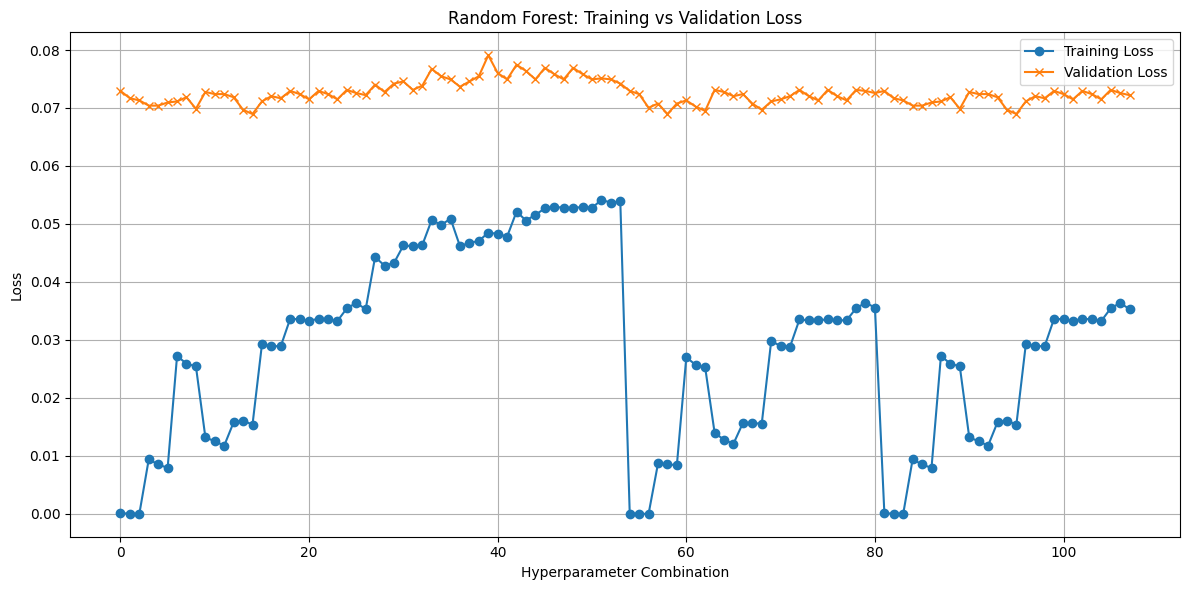

In [18]:
train_loss_rf = 1 - grid_search_rf.cv_results_['mean_train_score']
val_loss_rf = 1 - grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss_rf, label='Training Loss', marker='o')
plt.plot(val_loss_rf, label='Validation Loss', marker='x')
plt.title('Random Forest: Training vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Loss')
#plt.xticks(ticks=range(len(param_grid['n_estimators'])), labels=[str(params) for params in grid_search_rf.cv_results_['params']], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
lr_clf = LogisticRegression()

# Define hyperparameter grid
# Define hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}


# Initialize Grid Search
grid_search_rf = GridSearchCV(lr_clf, param_grid_logreg, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

# Perform Grid Search
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_rf)

# Best model
best_rf_clf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


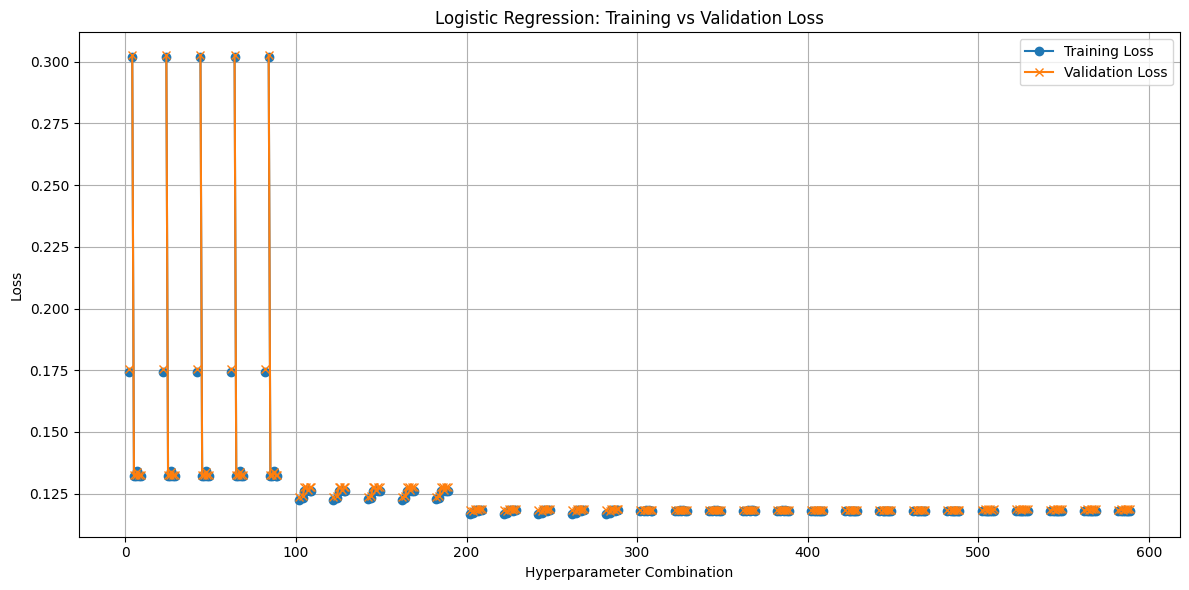

In [20]:
train_loss_rf = 1 - grid_search_rf.cv_results_['mean_train_score']
val_loss_rf = 1 - grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss_rf, label='Training Loss', marker='o')
plt.plot(val_loss_rf, label='Validation Loss', marker='x')
plt.title('Logistic Regression: Training vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Loss')
#plt.xticks(ticks=range(len(param_grid['n_estimators'])), labels=[str(params) for params in grid_search_rf.cv_results_['params']], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
dt_clf = DecisionTreeClassifier()

# Define hyperparameter grid
# Define hyperparameter grid for Logistic Regression
# Define hyperparameter grid for Decision Tree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


# Initialize Grid Search
grid_search_rf = GridSearchCV(dt_clf, param_grid_dt, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

# Perform Grid Search
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Decision Tree Classifier:", best_params_rf)

# Best model
best_rf_clf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


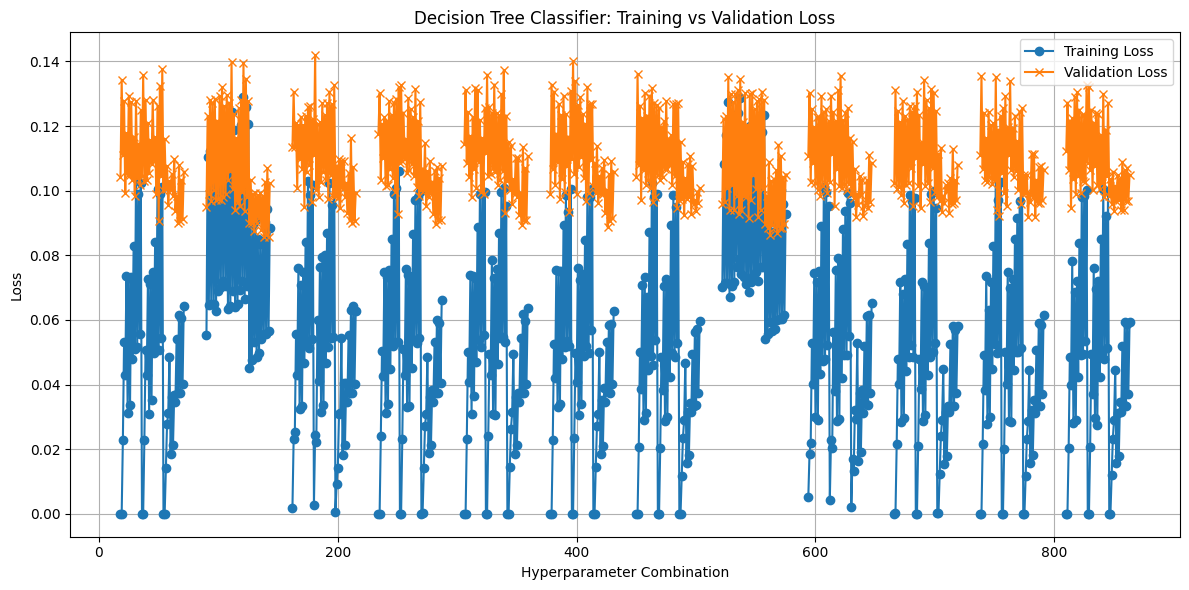

In [22]:
train_loss_rf = 1 - grid_search_rf.cv_results_['mean_train_score']
val_loss_rf = 1 - grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss_rf, label='Training Loss', marker='o')
plt.plot(val_loss_rf, label='Validation Loss', marker='x')
plt.title('Decision Tree Classifier: Training vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Loss')
#plt.xticks(ticks=range(len(param_grid['n_estimators'])), labels=[str(params) for params in grid_search_rf.cv_results_['params']], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()